Column Names: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Preview of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
No missing values found.


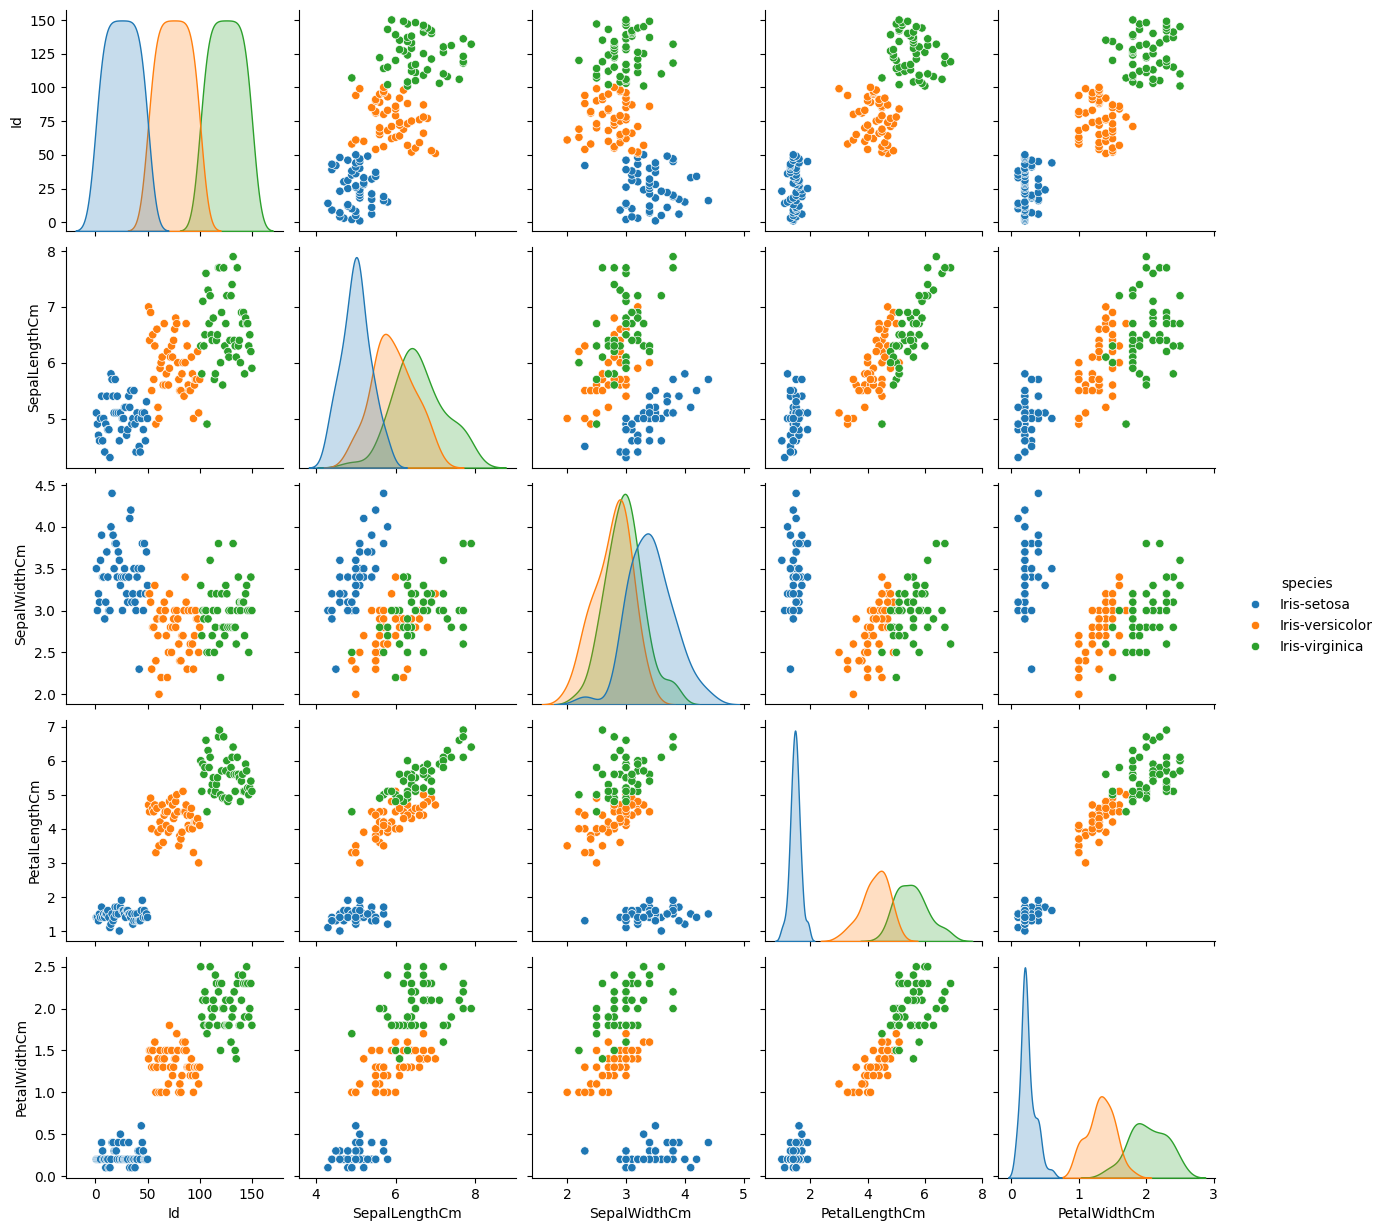

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Model Accuracy: 100.00%

Feature Importances:
Id               0.399642
PetalLengthCm    0.286572
PetalWidthCm     0.259441
SepalLengthCm    0.046634
SepalWidthCm     0.007711
dtype: float64


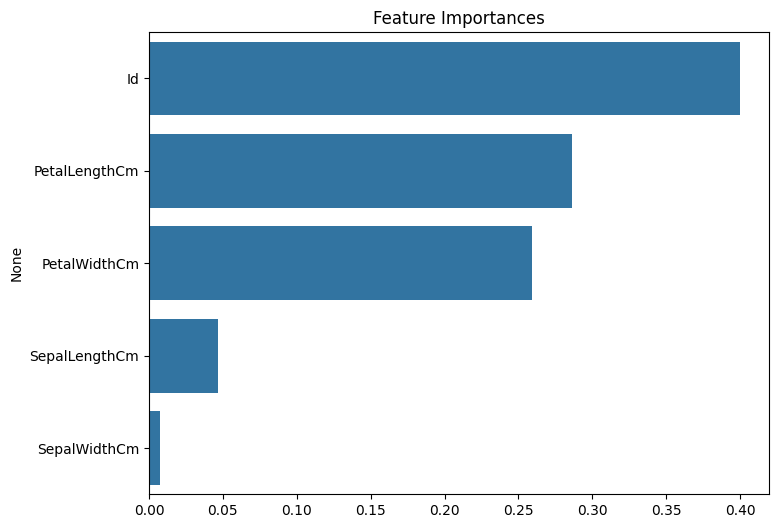

In [3]:
# Iris Flower Classification
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "Iris.csv"
iris_data = pd.read_csv(url)

# Display column names to verify structure
print("Column Names:", iris_data.columns)

# Ensure correct column name for species
if 'species' not in iris_data.columns:
    if 'Species' in iris_data.columns:
        iris_data.rename(columns={'Species': 'species'}, inplace=True)
    else:
        raise KeyError("The 'species' column is not found in the dataset.")

# Display first few rows
def preview_data(data):
    print("Preview of the dataset:")
    print(data.head())

preview_data(iris_data)

# Check for null values
if iris_data.isnull().sum().sum() == 0:
    print("No missing values found.")
else:
    print("Missing values detected:")
    print(iris_data.isnull().sum())

# Visualizing the data
sns.pairplot(iris_data, hue="species")
plt.show()

# Splitting features and labels
X = iris_data.drop(columns=["species"])
y = iris_data["species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)

# Visualizing feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importances")
plt.show()
